# Lab 3: The Moving to Opportunity (MTO) Experiment

## Methods/concepts: treatment effect estimation, non-compliance, intent-to-treat (ITT) effects, treatment-on-the-treated (TOT) effects, bar graphs to visualize treatment effects

**Name:** Shreya Chaturvedi

**Email:** shreyachaturvedi@hks.harvard.edu

**HUID:** 31575036

**Lab:** Thursday 3pm at HKS

**Date:** February 15th, 2024

**LAB DESCRIPTION**

This lab uses data from the Moving to Opportunity (MTO) Experiment
called **mto.dta** to estimate the causal effect of neighborhoods on
mental health.[1] For more details on the variables included in these
data, see [Table 1](#Table1). A list and description of each of the R commands needed for this lab are contained in [Table 2](#TABLE-2:-R-Commands). You should have these commands next to you as you work through the lab.

The Moving to Opportunity (MTO) Experiment was implemented by the
Department of Housing and Urban Development in 1994-1998. [Figure
1](#Figure-1) shows the most common housing locations for families in the
control group (the Martin Luther King Jr. Towers in Harlem) and the
experimental group (Wakefield in the Bronx). [Figure 2](#Figure-2) shows
the recruitment flyer for the experiment.

In today’s lab, we will look at the long-run impacts on mental health of
individuals who were adults when experiment was conducted in 1994-1998.
We will focus on individuals in the Experimental Voucher and Control
group only. The outcome variable that we will focus on is the [Kessler 6
Psychological Distress
Index](https://scienceofbehaviorchange.org/measures/kessler-psychological-distress-scale-k6/)
score measured in interviews conducted between June 2008 and April 2010.
The Kessler 6 Psychological Distress Index was developed by Ronald
Kessler at Harvard Medical School. (Kessler was a co-author with Ludwig,
Duncan, Gennetian, Katz, Kling, and Sanbonmatsu on a long-run follow up
of MTO published in [*Science* in
2012](https://science-sciencemag-org.ezp-prod1.hul.harvard.edu/content/337/6101/1505.abstract).
The data for this lab are from their paper).

## **QUESTIONS**

1.  Briefly summarize the results from the lecture on the Moving to
    Opportunity Experiment. What were the results for individuals who
    were young children in 1994-1998? What were the results for older
    children and adults in 1994-1998?

In [1]:
# QUESTION 1 Code


**Question 1 Answer**
The Moving to Opportunity (MTO) experiment results indicate that for young children (those below age 13 in 1994-1998), there was a statistically significant improvement in health outcomes. However, for older children and adults from the same time period, the experiment did not have a statistically significant impact.

2.  Now turn to the **mto.dta** file. What fraction of individuals in
    the control group moved? Report the mean of *moved* for observations
    with *voucher* equal to 0.

In [2]:
#clear the workspace
rm(list=ls()) # removes all objects from the environment

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven)

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/mto.dta", "mto.dta", mode = "wb")
mto <- read_dta("mto.dta")

# QUESTION 2 Code
mean_moved_control <- mean(mto$moved[mto$voucher == 0], na.rm = TRUE) #Mean of variable moved when voucher is zero
mean_moved_control

Loading required package: haven



[1] 0

**Question 2 Answer**

The mean of moved for observations with voucher equal to 0 is 0. In other words, no one from the control group moved. 

3.  What fraction of individuals in the experimental group moved? Report
    the mean of *moved* for observations with *voucher* equal to 1.

In [3]:
# QUESTION 3 Code
mean_moved_treatment <- mean(mto$moved[mto$voucher == 1], na.rm = TRUE) #Mean of variable moved when voucher is one
mean_moved_treatment

[1] 0.4306319

**Question 3 Answer**

The mean of moved for observations with voucher equal to 1 is 0.43. In other words, 43% of the treatment group moved. 

4.  What do your results in the previous questions tell us about the
    *compliance rate* in the Moving to Opportunity Experiment? Is there
    non-compliance, and if so, is it one-sided or two-sided?


In [4]:
# QUESTION 4 Code

**Question 4 Answer**

Based on the previous results, where 0% of the control group moved and 43% of the treatment group moved, we can infer the following about compliance:

- The control group had perfect compliance since none of the individuals moved, which aligns with them not being offered vouchers.
- The treatment group had partial compliance since only 43% of the individuals moved, despite being offered vouchers.

This indicates that there is non-compliance in the treatment group. The non-compliance is one-sided because it only affects the treatment group—those offered vouchers who chose not to move. If there were individuals in the control group who also moved, then we would consider the non-compliance to be two-sided. 

5.  What is the sample mean of the *Kessler 6 Psychological Distress
    Index score* for individuals in the control group? Report the mean
    of *kessler* for observations with *voucher* equal to 0.


In [5]:
# QUESTION 5 Code
mean_kessler_control <- mean(mto$kessler[mto$voucher == 0], na.rm = TRUE) #Mean of variable Kessler when voucher is zero
mean_kessler_control

[1] 6.880597

**Question 5 Answer**

The average Kessler score for the control group is 6.88 as shown above.

6.  What is the sample mean of the *Kessler 6 Psychological Distress
    Index score* for individuals in the experimental group? Report the
    mean of *kessler* for observations with *voucher* equal to 1.


In [6]:
# QUESTION 6 Code
mean_kessler_treatment <- mean(mto$kessler[mto$voucher == 1], na.rm = TRUE) #Mean of variable Kessler when voucher is one
mean_kessler_treatment

[1] 6.292582

**Question 6 Answer**

The average Kessler score for the treatment group is 6.29 as shown above.

7.  Estimate a linear regression (regress in stata and lm in R) of
    *kessler* on an intercept and *voucher*. What is the relationship
    between the estimated coefficients in the regression and the means
    that you reported in questions 5-6?

In [7]:
# QUESTION 7 Code
lm1 <- lm(kessler ~ voucher, data = mto)
lm1


Call:
lm(formula = kessler ~ voucher, data = mto)

Coefficients:
(Intercept)      voucher  
      6.881       -0.588  


**Question 7 Answer**

This mean of the control group is the intercept in the regression, and the difference between the control and the treatment group is the coefficient of voucher in the regression. This is in line with the averages reported above, where we find that getting a voucher reduces the kessler score by 0.588 (6.88-6.29) on average, holding all else constant.

8.  Use the regression output from question 7 to report the
    *intent-to-treat effect* of the experimental voucher on the *Kessler
    6 Psychological Distress Index score.*

In [8]:
# QUESTION 8 Code
intent_to_treat <- unname(coef(lm1)["voucher"])
print(intent_to_treat)

[1] -0.5880146


**Question 8 Answer**

This coefficient value of -0.588 represents the ITT effect. It indicates that the receipt of a voucher is associated with a decrease of 0.588 points in the Kessler 6 score, on average, compared to those who did not receive a voucher.

9.  Estimate a linear regression (regress in stata and lm in R) of
    *moved* on an intercept and *voucher*. Use the regression output to
    report the *compliance rate* in the experiment. Does your estimate
    match the calculation from question 4?

In [9]:
# QUESTION 9 Code
lm2 <- lm(moved ~ voucher, data = mto)
lm2


Call:
lm(formula = moved ~ voucher, data = mto)

Coefficients:
(Intercept)      voucher  
 -8.381e-17    4.306e-01  


**Question 9 Answer**

The coefficient of voucher implies that getting a voucher is associated with an average increase of 0.43 in moved, holding all else equal. This is in line with the earlier question where the average moved rate for treatment group was 0.43 higher than the moved rate of the average control group. 

10.  Use your estimates of the compliance rate and the intent-to-treat
    effect in the previous questions to estimate the
    *treatment-on-the-treated effect* of actually using the experimental
    voucher to move (the variable *moved*) on the psychological distress
    index (the variable *kessler*). Provide some intuition for the
    calculation of the TOT estimate.

In [10]:
# QUESTION 10 Code
compliance_rate <- unname(coef(lm2)[["voucher"]])
treatment_on_treated <- intent_to_treat/compliance_rate
treatment_on_treated

[1] -1.365469

**Question 10 Answer**

Given that:

- ITT effect (the coefficient for voucher) = -0.588
- Compliance rate (proportion of the treatment group that moved) = 0.43

The TOT can be estimated as:

TOT = -0.588/ 0.43
TOT= -1.367
​

Intuition: This calculation assumes that the observed ITT effect is diluted by the individuals who did not comply (did not move despite receiving a voucher). By dividing by the compliance rate, we are scaling up the ITT effect to estimate its full impact on those who did move. This provides a more accurate estimate of the effect of the treatment for those who actually received the treatment as intended.

11.  A natural, but incorrect, way of analyzing data from an experiment
    with non-compliance is to compare outcomes for those who actually
    received the treatment and those who did not receive the treatment.
    Imbens and Rubin (2015) refer to this incorrect analysis as an
    “As-Treated” analysis. Implement this incorrect approach by
    calculating the difference in means of *kessler* for those who moved
    and those who did not move.

In [11]:
# QUESTION 11 Code

mean_kessler_moved <- mean(mto$kessler[mto$moved == 1], na.rm = TRUE)
mean_kessler_not_moved<- mean(mto$kessler[mto$moved == 0], na.rm = TRUE)

as_treated <- mean_kessler_moved - mean_kessler_not_moved
as_treated


[1] -0.5263304

**Question 11 Answer**

This calculation suggests that individuals who moved have a Kessler psychological distress score that is 0.526 points lower, on average, than those who did not move. However, this approach does not account for the random assignment of the treatment and may be biased due to non-compliance and other factors not controlled for in the experimental design. 

12.  Another incorrect way of analyzing data from an experiment with
    non-compliance is to drop observations in the treatment group that
    did not receive the treatment (and drop observations from the
    control group who actually received the treatment if there are any).
    Imbens and Rubin (2015) refer to this incorrect analysis as a “Per
    Protocol” analysis. Implement this incorrect approach by calculating
    the differences in means for *kessler* in the experimental treatment
    versus control group, after excluding observations in the treatment
    group that did not move (i.e., voucher == 1 & moved == 0).

In [12]:
# QUESTION 12 Code
mto_subset <- mto[(mto$voucher == 0) | ((mto$voucher == 1) & (mto$moved == 1)), ]
mean_kessler_treatment_pp <- mean(mto_subset$kessler[mto_subset$voucher == 1], na.rm = TRUE)
mean_kessler_control_pp <- mean(mto_subset$kessler[mto_subset$voucher == 0], na.rm = TRUE)
per_protocol <- mean_kessler_treatment_pp - mean_kessler_control_pp
per_protocol

[1] -0.7290819

**Question 12 Answer**

This calculation suggests that, within this subset of the data, the experimental treatment group (those who received the voucher and moved) has a kessler psychological distress score that is 0.729 points lower, on average, than the control group (those who did not receive the voucher). This method, however, may introduce bias since it only considers those who complied with the treatment protocol, potentially ignoring the random assignment's intention to compare all individuals irrespective of compliance.

13.  Contrast your (incorrect) “per protocol” and “as treated” estimates
    with the (correct) *treatment-on-the-treated effect* estimate you
    calculated earlier. Which method yields the biggest estimate?

In [13]:
# QUESTION 13 Code
results_table <- data.frame(
  as_treated = as_treated,
  per_protocol = per_protocol,
  treatment_on_treated = treatment_on_treated
)

results_table <- t(results_table)
rownames(results_table) <- c('As Treated', 'Per Protocol', 'Treatment on Treated')

print(results_table)


                           [,1]
As Treated           -0.5263304
Per Protocol         -0.7290819
Treatment on Treated -1.3654693


**Question 13 Answer**

As seen in the table here, the treatment on treated metric is the highest (in magnitude) or implies the most decrease in the kessler score as a result of the MTO experiment. 

14.  Explain why the “per protocol” and “as treated” approaches lead to
    biased estimates, while the TOT leads to valid inference about the
    impact of MTO.

In [14]:
# QUESTION 14 Code

**Question 14 Answer**

The "Per Protocol" and "As Treated" approaches can lead to biased estimates because they violate the random assignment principle of experiments by only including individuals who comply with the treatment, potentially introducing self-selection bias. As a result, these methods create comparisons between groups that may differ systematically beyond the treatment itself. 

On the other hand, the Treatment-on-the-Treated (TOT) approach provides valid inference because it adjusts for non-compliance and estimates the effect of treatment among those who actually received it, preserving the benefits of randomization by accounting for the initial random assignment in its calculation.

15.  The most natural way to visualize estimates from a randomized
    experiment is using a bar graph, with one bar representing the
    control group and a second bar representing the treatment group. The
    height of the bar for the treatment group equals the sum of the
    control group mean and the ITT or TOT estimate, allowing one to
    easily judge the magnitude of the treatment effects. Construct three
    bar graphs (and include them in your lab write up) to visualize:

     1.  The fraction of the control group that moved and the fraction of the treatment group that moved from questions 2 and 3.
     2.  The mean of *kessler* in the control group and the mean of *kessler* in the treatment group, corresponding to the intent-to-treat (ITT) effect estimate from question 8.
     3.  The mean of *kessler* in the control group and the *adjusted* mean of *kessler* in the treatment group, corresponding to the treatment-on-the-treated (TOT) effect from question 10.

In [15]:
# QUESTION 15 Code
library(ggplot2)

data_for_graph1 <- data.frame(
  Moved = c(mean_moved_control, mean_moved_treatment),
  Group = c("Control group", "Treatment group")
)
data_for_graph2 <- data.frame(
  Kessler = c(mean_kessler_control, mean_kessler_control + intent_to_treat),
  Group = c("Control group", "Treatment group")
)
data_for_graph3 <- data.frame(
  Kessler = c(mean_kessler_control, mean_kessler_control + treatment_on_treated),
  Group = c("Control group", "Treatment group")
)

# ggplot(data=data_for_graph1, aes(x=Group, y=Moved, fill=Group)) +
#  geom_bar(stat="identity", show.legend = FALSE, width=.6) +
#  scale_fill_manual(values=c("red", "blue")) +
#  labs(y = "Fraction that Moved", x = "") +
#  geom_text(aes(label = sprintf("%0.1f", round(Moved, digits = 2))), vjust = 1.5, colour = "white")
# ggsave("fig1.png")

# ggplot(data=data_for_graph2, aes(x=Group, y=Kessler, fill=Group)) +
#  geom_bar(stat="identity", show.legend = FALSE, width=.6) +
#  scale_fill_manual(values=c("red", "blue")) +
#  labs(y = "Mean Kessler Score - ITT", x = "") +
#  geom_text(aes(label = sprintf("%0.1f", round(Kessler, digits = 2))), vjust = 1.5, colour = "white")
# ggsave("fig2.png")

# ggplot(data=data_for_graph3, aes(x=Group, y=Kessler, fill=Group)) +
#   geom_bar(stat="identity", show.legend = FALSE, width=.6) +
#   scale_fill_manual(values=c("red", "blue")) +
#   labs(y = "Adjusted Mean Kessler Score - T)T", x = "") +
#   geom_text(aes(label = sprintf("%0.1f", round(Kessler, digits = 2))), vjust = 1.5, colour = "white")
# ggsave("fig3.png")

**Question 15 Answer**
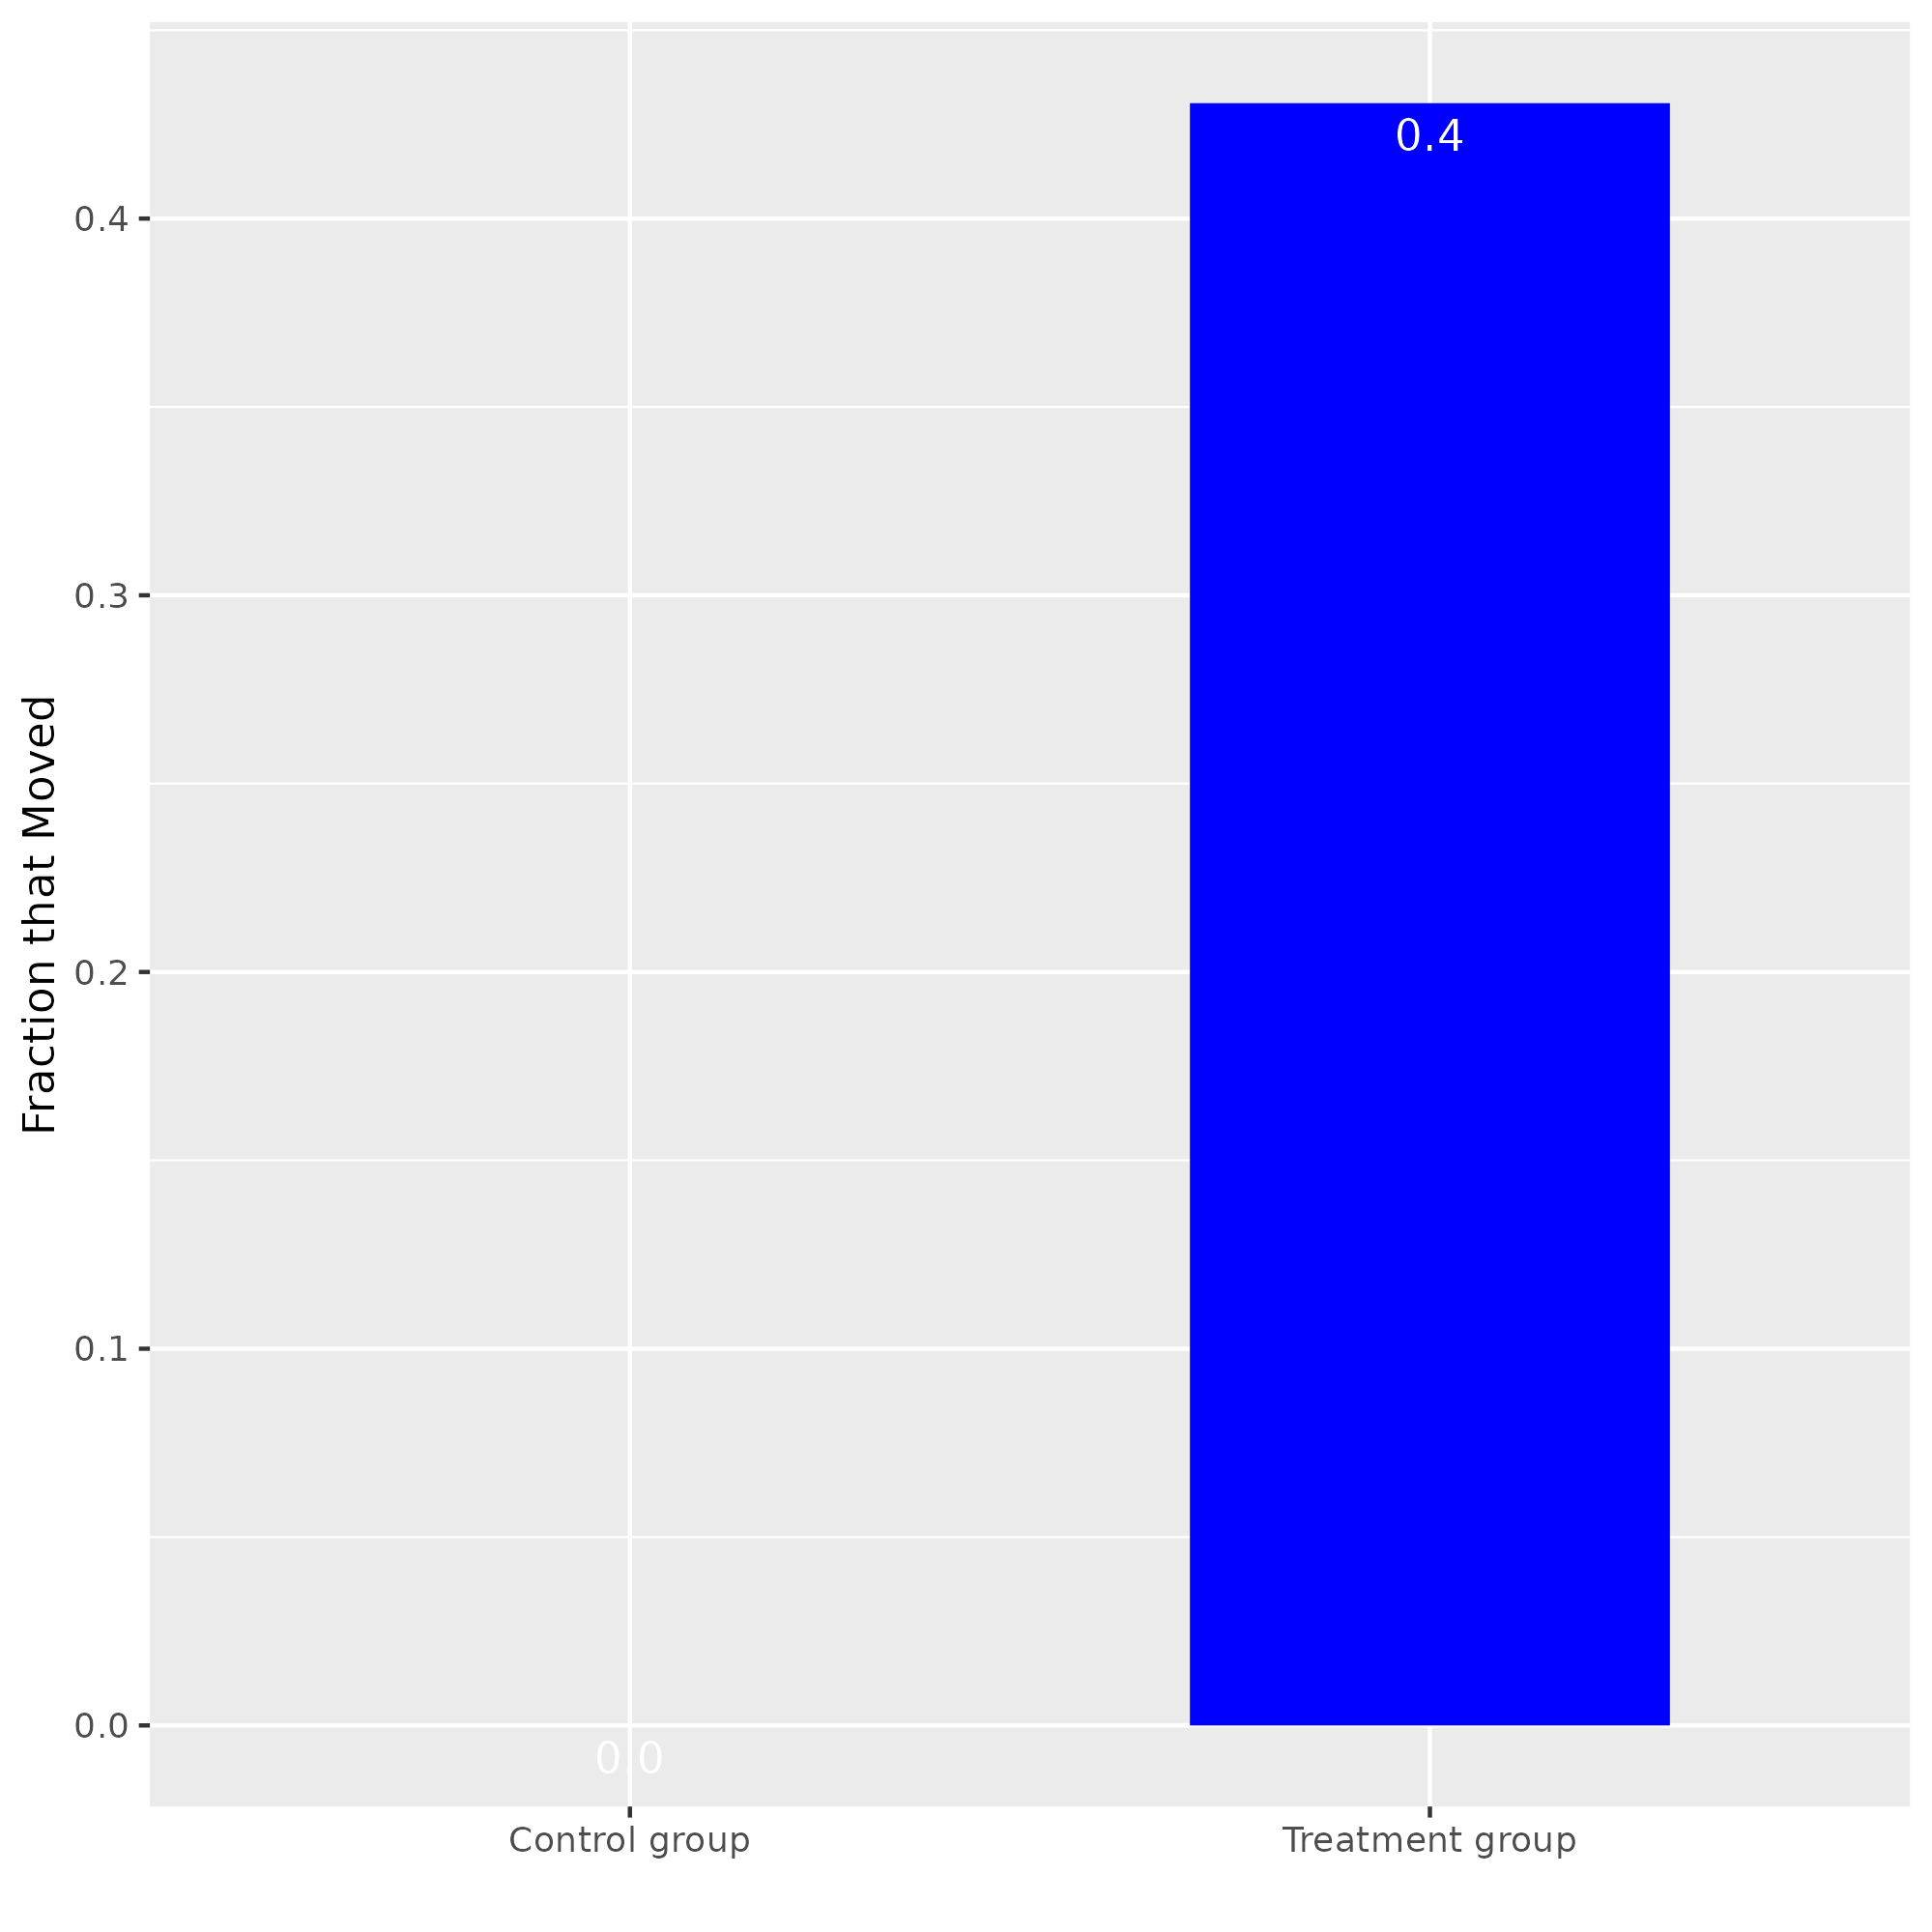
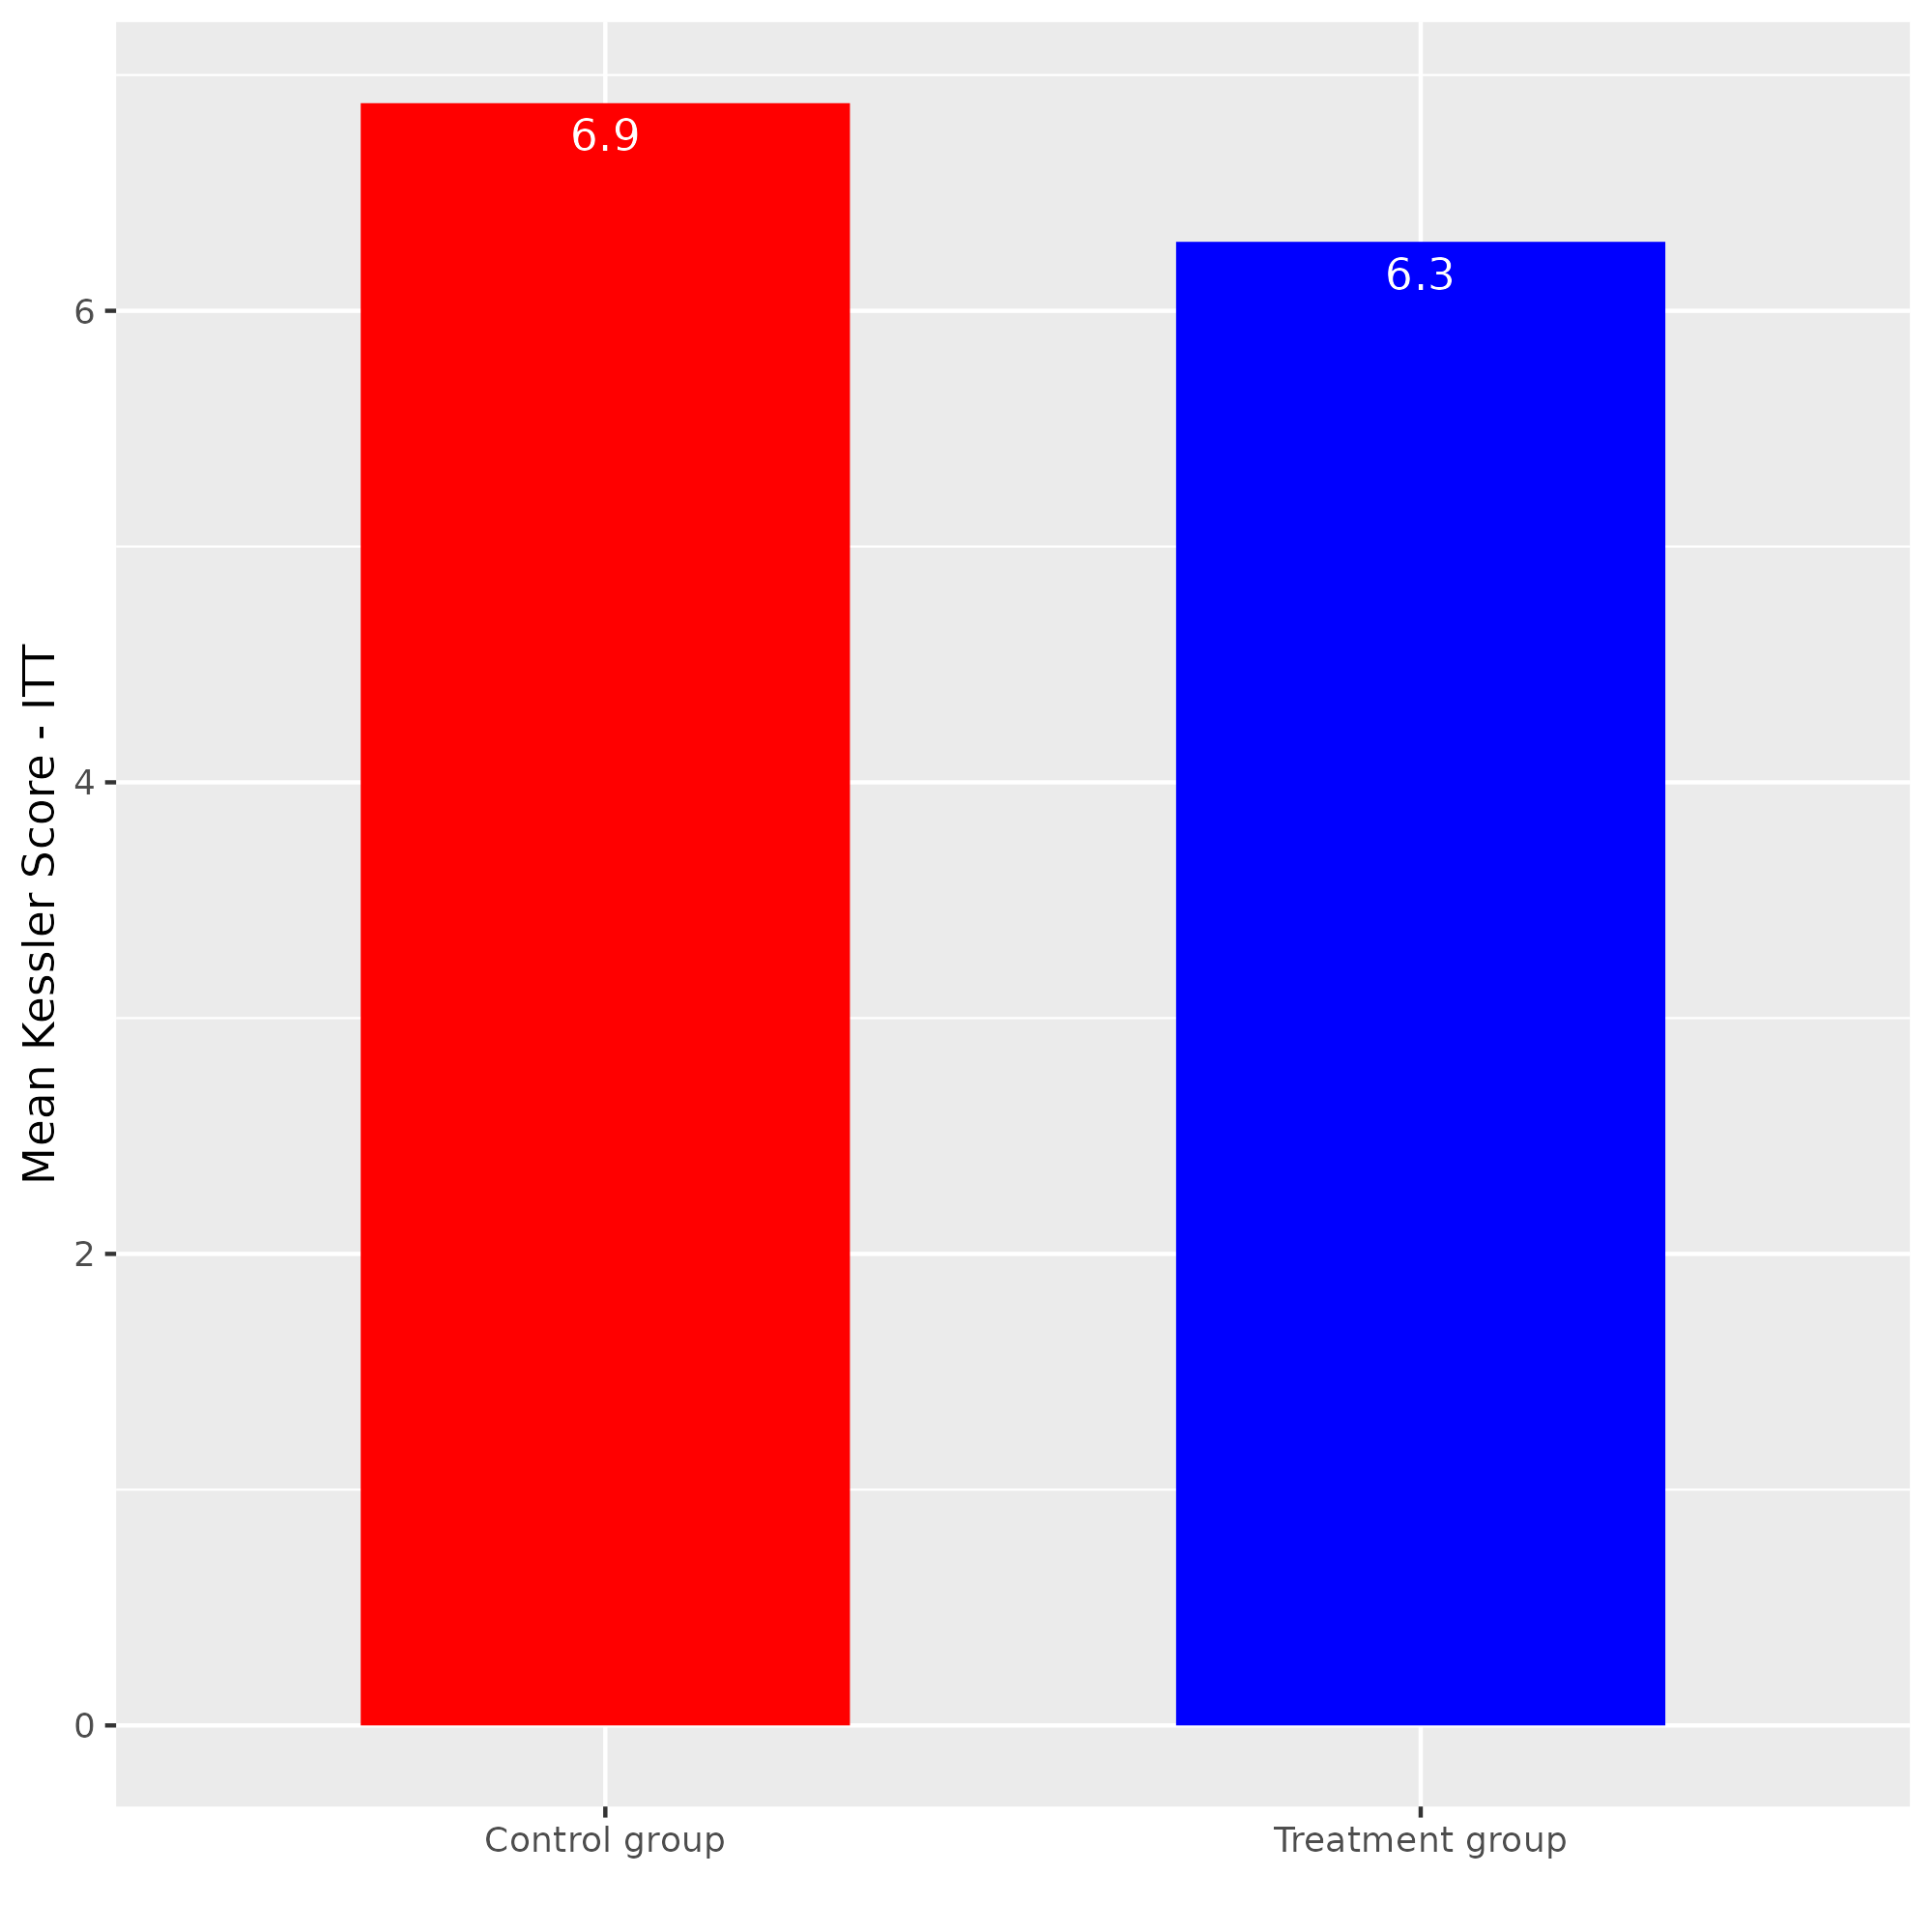
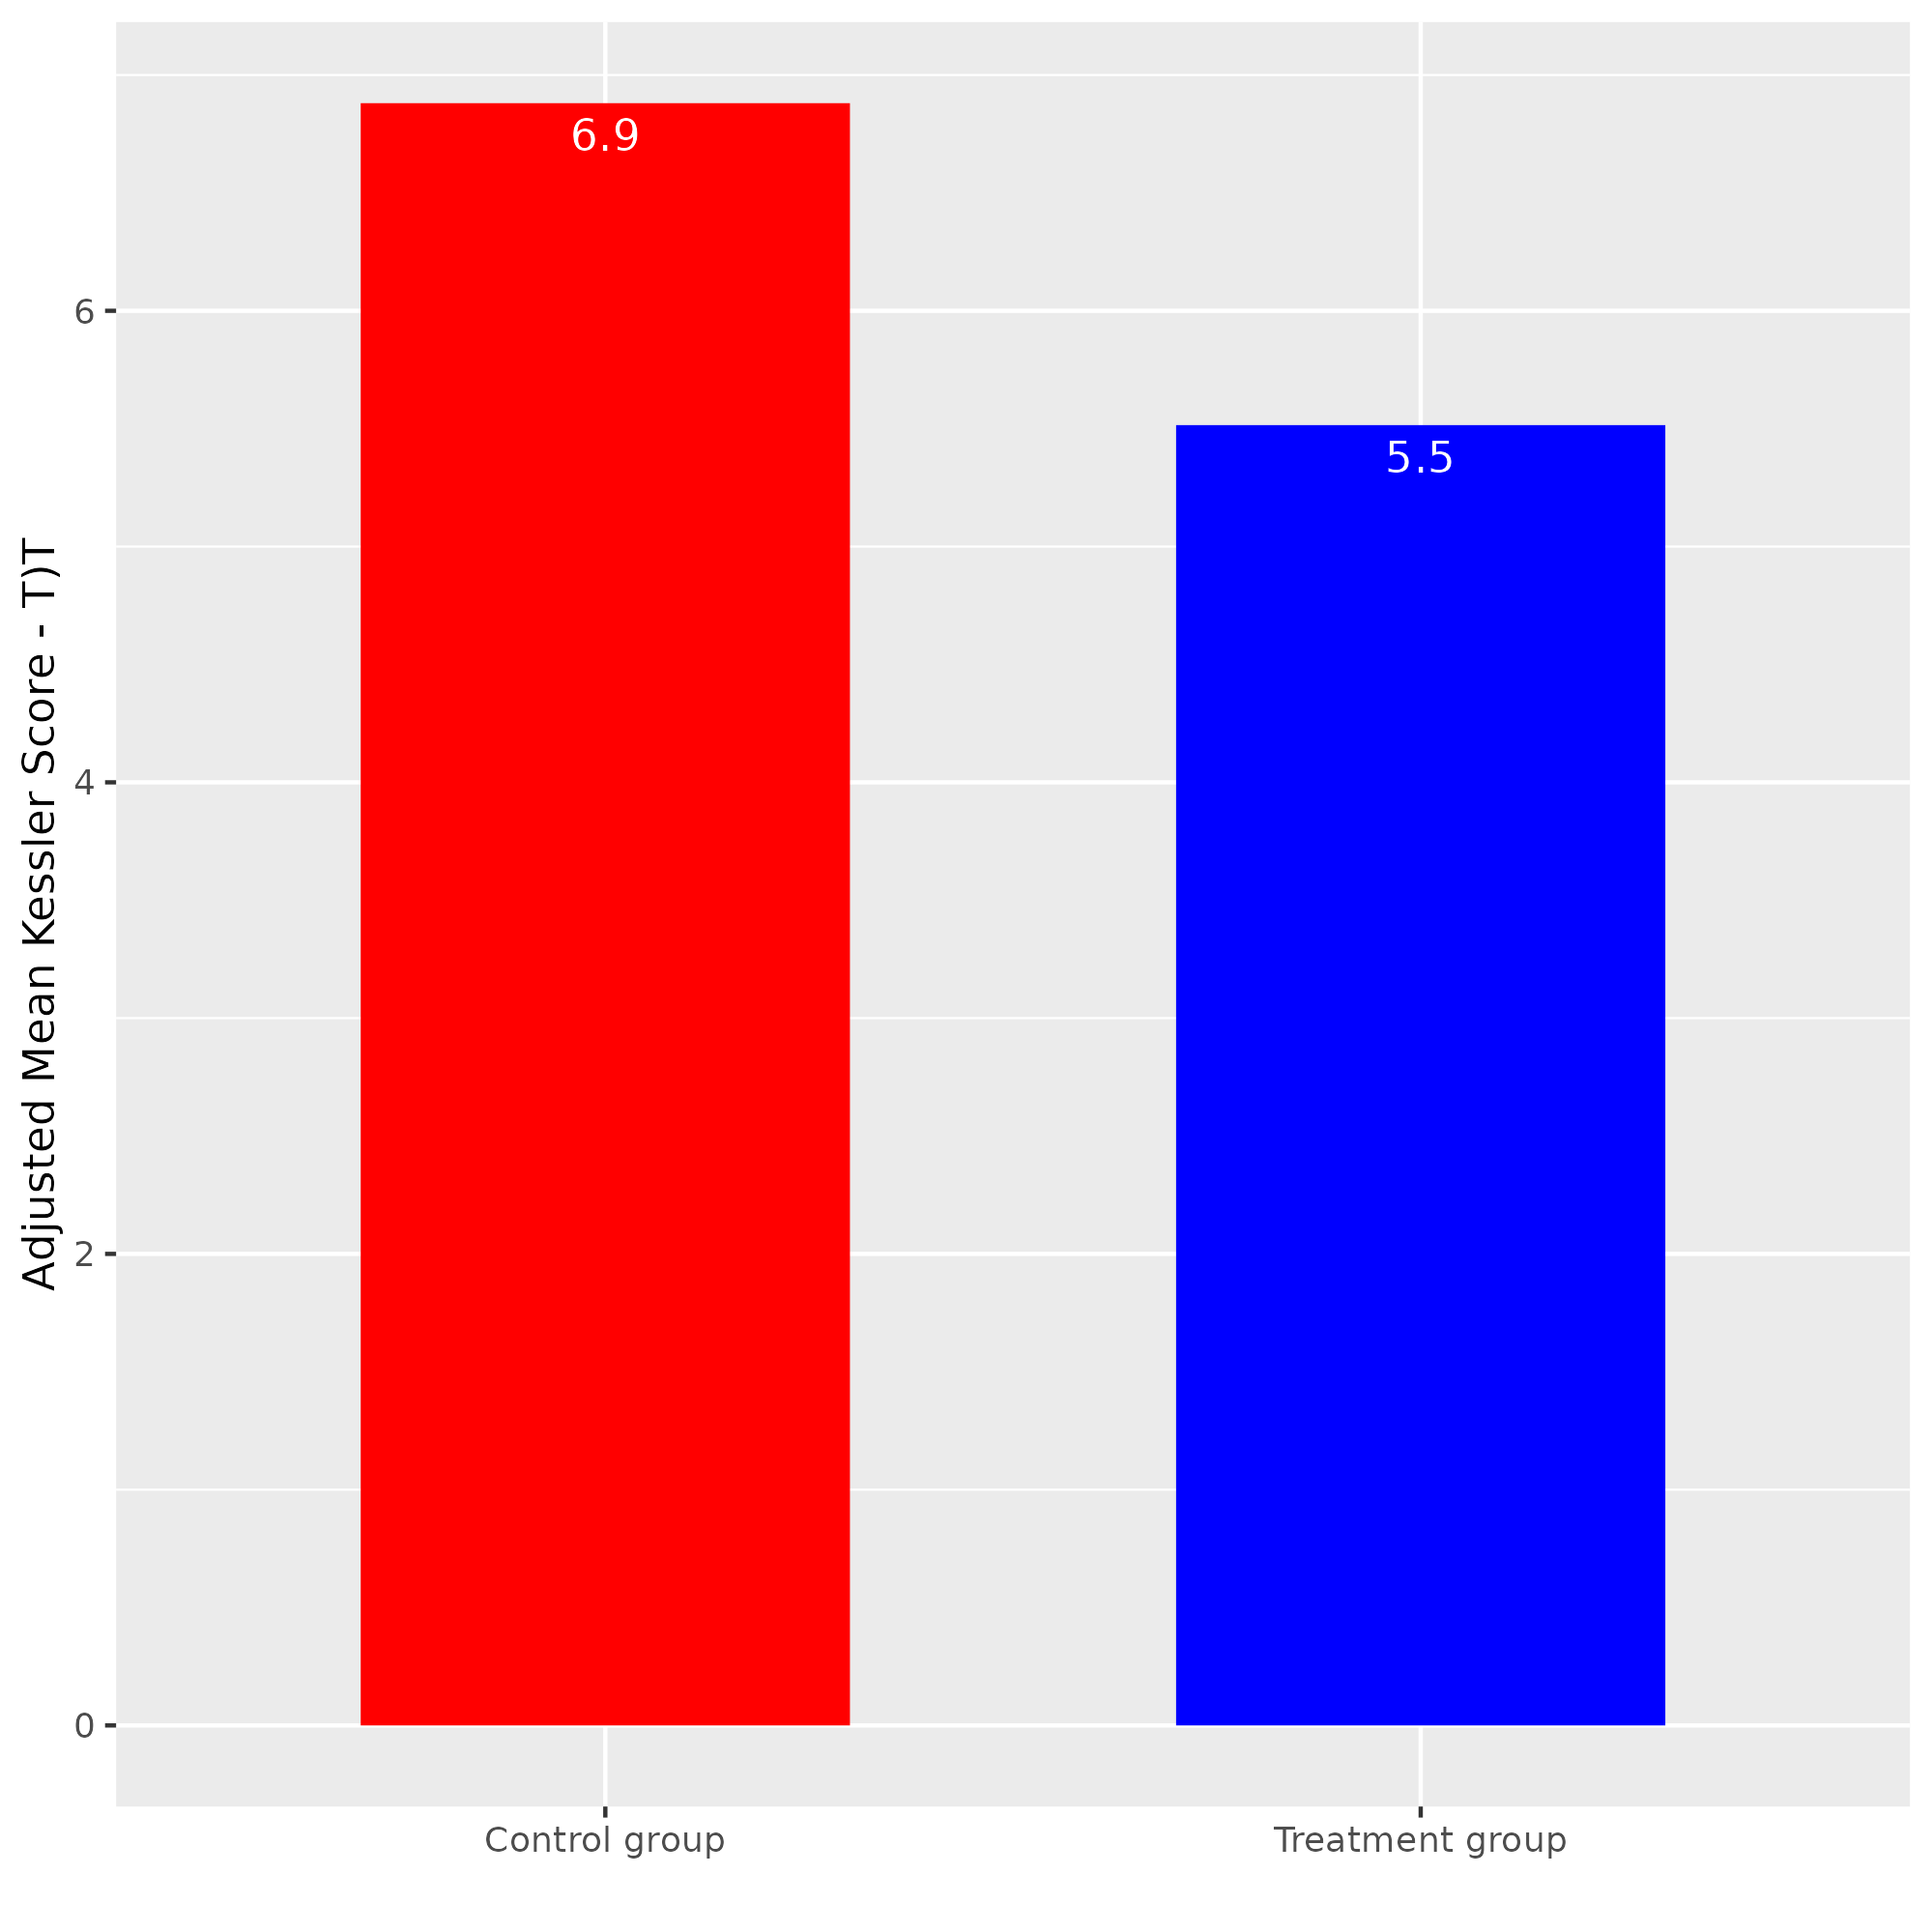

16. Create an annotated/commented do-file, .ipynb Python Notebook, or .R file that can replicate all your analyses above. This will be the final code that you submit
    on Gradescope. The motivation for using do-files and .R files is
    described on [the next page](#Dofiles), which has been adapted from
    training materials used by [Innovations for Poverty Action
    (IPA)](https://www.poverty-action.org/) and the [Abdul Latif Jameel
    Poverty Action Lab (J-PAL)](https://www.povertyactionlab.org/).

## How to submit your assignment

|  |  |
|--|--|
| **Step 1** <br><br> Access the lab assignment under the “Assignments” tab on Canvas| 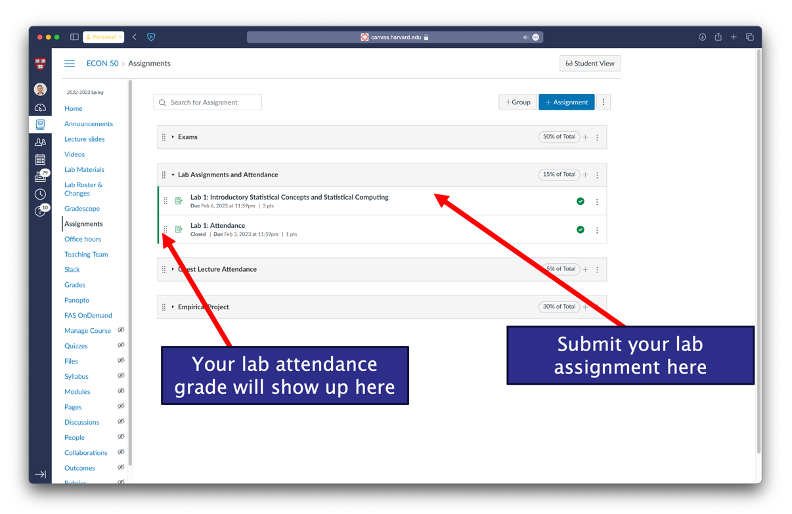 |
| **Step 2** <br><br> Access Gradescope from Canvas| 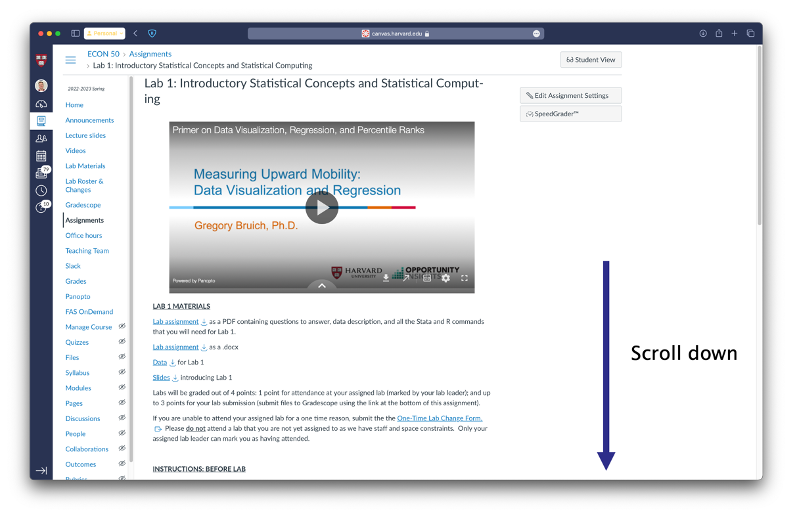 <br> 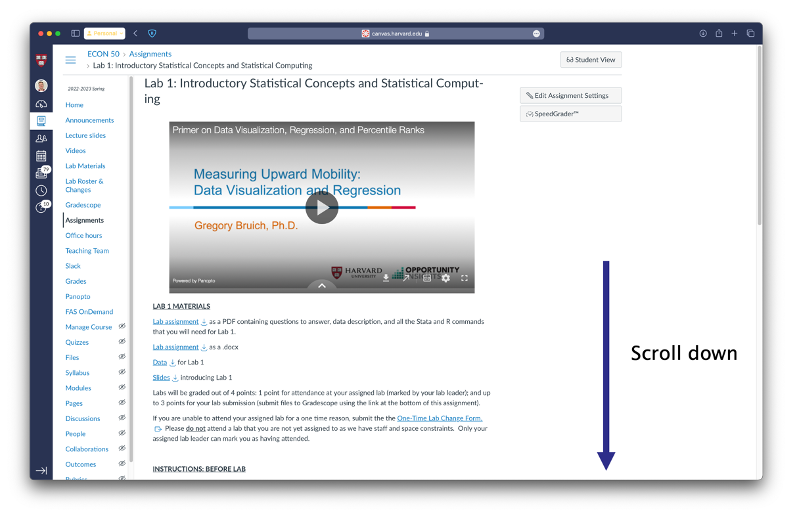|
| **Step 3** <br><br> Access the lab assignment on Gradescope| 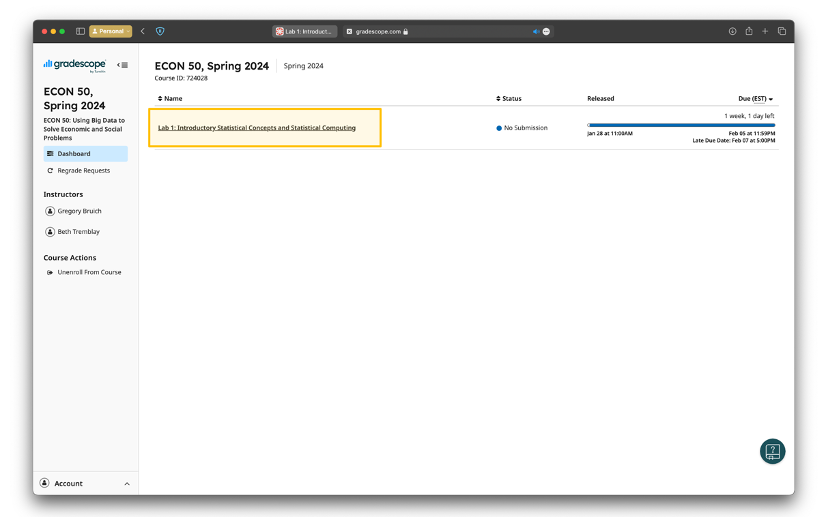 |
| **Step 4** <br><br> Upload your files<br><br> *Check [What files to submit](#What-files-to-submit) to confirm what files you need to submit.*| 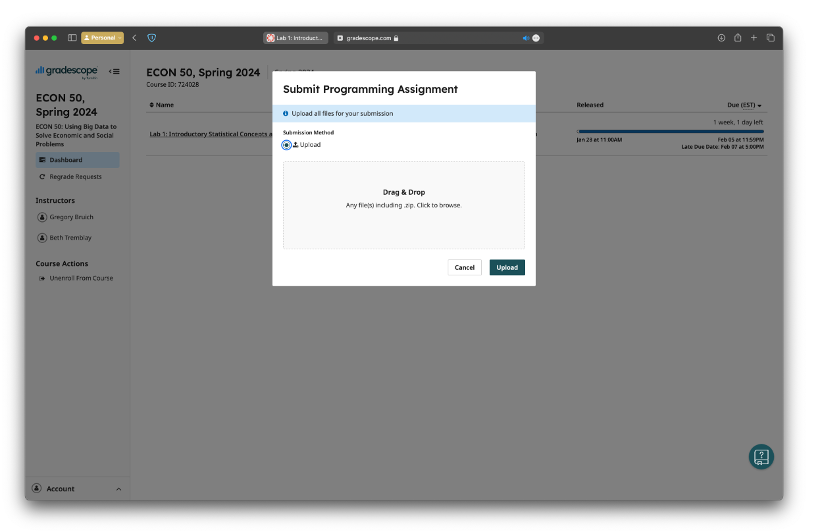 |
| **Step 5** <br><br> What you’ll see after submitting your lab assignment| 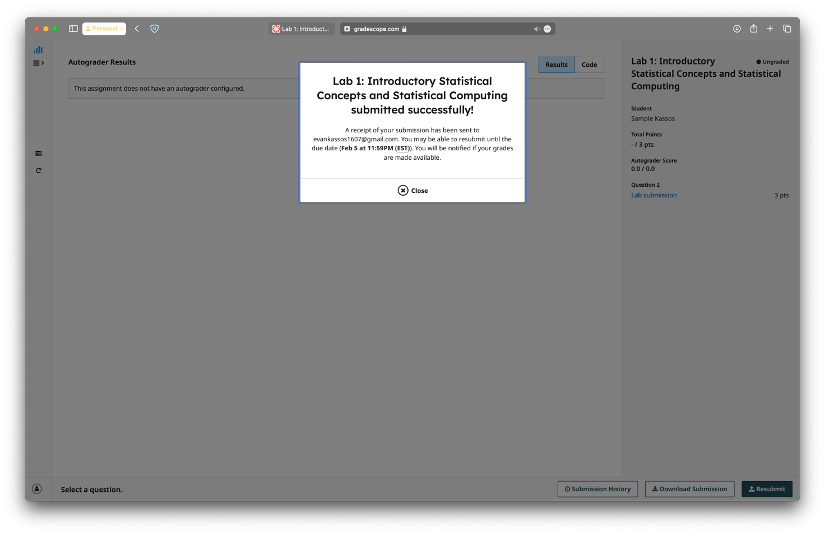 |
| **Step 6** <br><br> Check your submitted files| 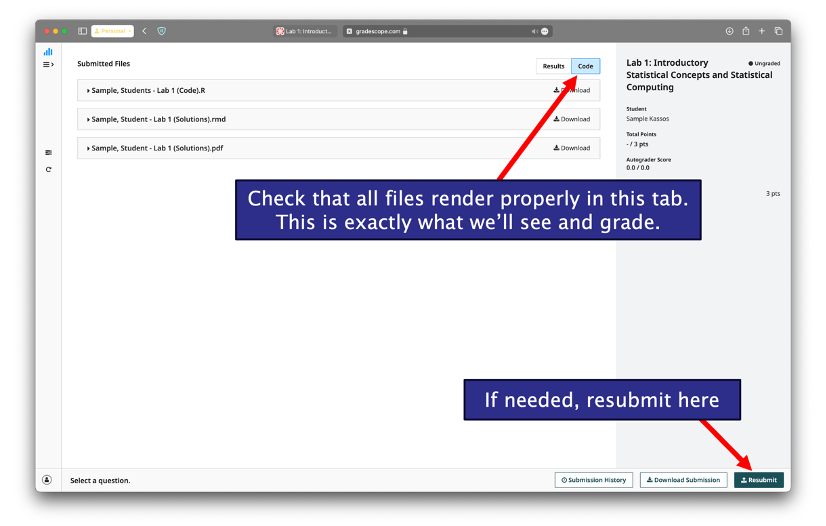 |
| **Step 7** <br><br> You’ll receive an email confirmation as well| 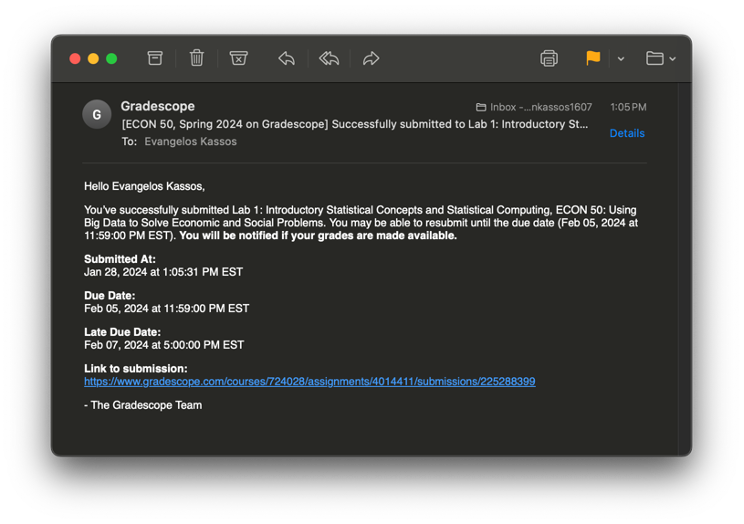 |

## What files to submit

|  |  |
|--|--|
| **If you’re using Python Notebook to write your R code, and a document editor to write your answers** <br><br> 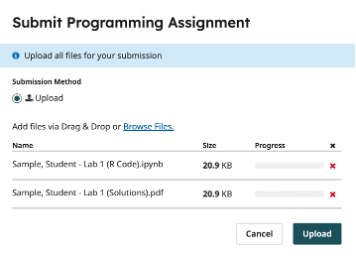| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit your answers as a .pdf file. **Do not submit a .doc/.docx file (Word document)**, as we are unable to read those files on Gradescope.</li></ul><br>_For graphs, always be sure to save them as .png files and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|
| **If you’re using a Python Notebook to write your R code AND to write your answers** <br><br> 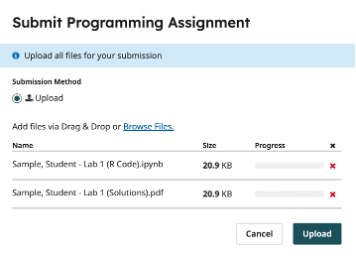| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>•	Submit the .pdf version of your .ipynb file.</li></ul><br>_For graphs, always be sure to save them as .png files and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br>**Do not submit ONLY the .ipynb file**, as we might have trouble reading your answers using those files on Gradescope.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|png)|

## WHAT ARE DO-FILES AND .R FILES AND WHY DO WE NEED ONE?<span id="Dofiles" class="anchor"></span>

*Let’s imagine the following situation - you just found out you have to
present your results to a partner– all the averages you produced and
comparisons you made. Suppose you also found out that the data you had
used to produce all these results was not completely clean, and have
only just fixed it. You now have incorrect numbers and need to re-do
everything.*

*How would you go about it? Would you reproduce everything you did for
Lab 1 from scratch? Can you do it? How long would it take you to do?
Just re-typing all those commands into Stata or R in order and checking
them would take an hour.*

*An important feature of any good research project is that the results
should be reproducible. For Stata and R the easiest way to do this is to
create a text file that lists all your commands in order, so anyone can
re-run all your Stata or R work on a project anytime. Such text files
that are produced within Stata or linked to Stata are called do-files,
because they have an extension .do (like intro_exercise.do). Similarly,
in R, these files are called .R files because they have an extension of
.R. These files feed commands directly into Stata or R without you
having to type or copy them into the command window.*

*An added bonus is that having do-files and .R files makes it very easy
to fix your typos, re-order commands, and create more complicated chains
of commands that wouldn’t work otherwise. You can now quickly reproduce
your work, correct it, adjust it, and build on it.*

*Finally, do-files and .R files make it possible for multiple people to
work on a project, which is necessary for collaborating with others or
when you hand off a project to someone else.*

# Figure 1
Most Common MTO Residential Locations in New York, NY

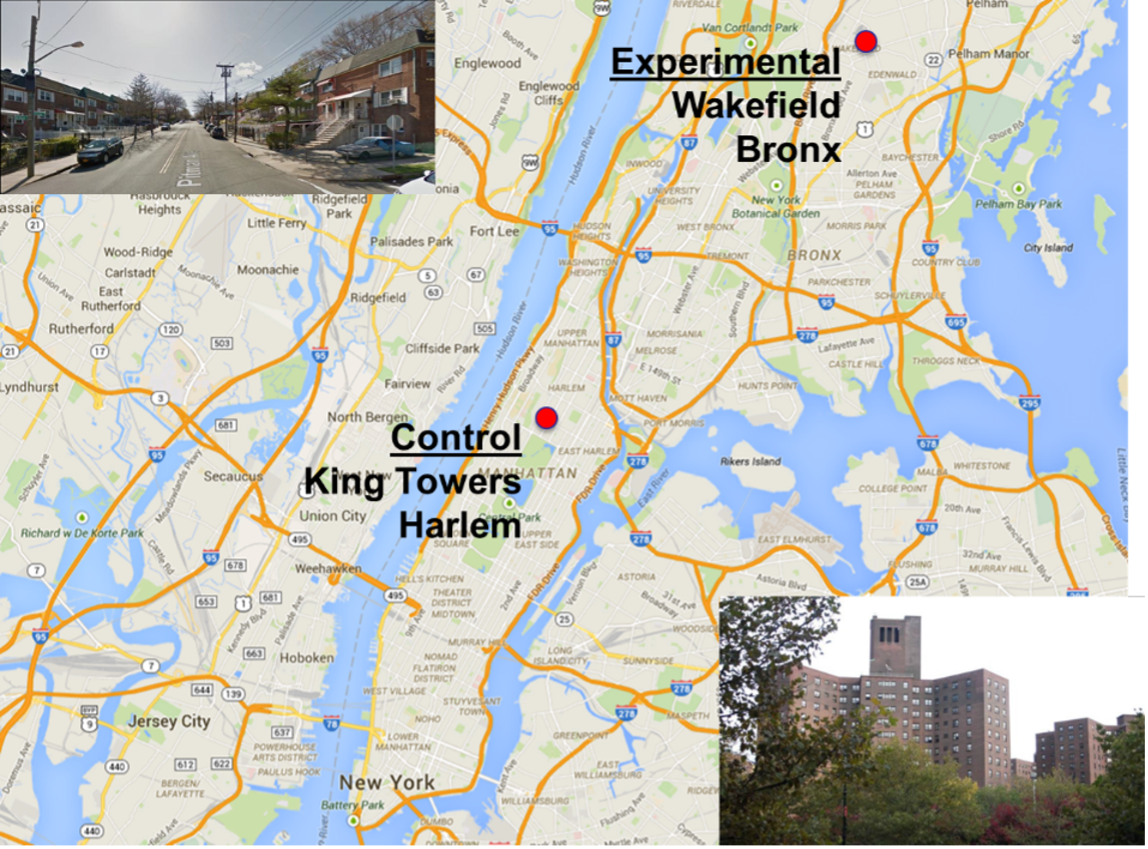

*Note:* Figure shows the most common housing locations for families in
the control group (the Martin Luther King Jr. Towers in Harlem) and the
experimental group (Wakefield in the Bronx) in the Moving to Opportunity
Experiment.

# Figure 2

Recruitment Flyer for the Moving to Opportunity Experiment

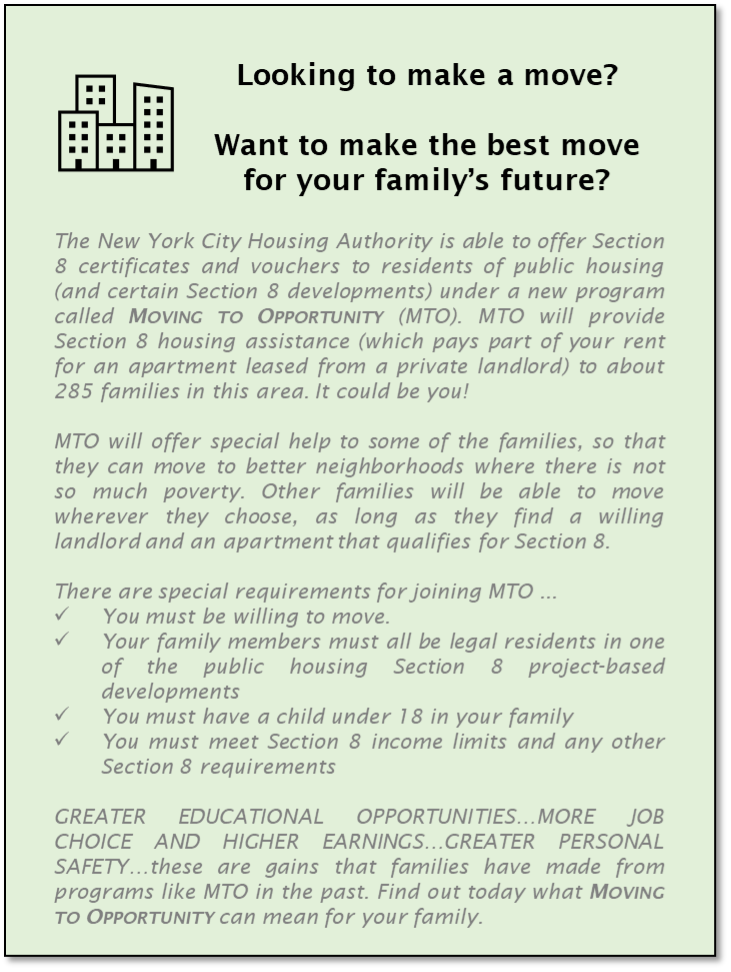

*Note:* Figure shows the recruitment flyer that was distributed in
public housing units to recruit participants for the Moving to
Opportunity Experiment.

## DATA DESCRIPTION, FILE: mto.dta

The data consist of $N = 2,595$ individuals in the Moving to Opportunity
Experiment who were adults (not children) in 1994-1998 when the
randomization was conducted. (Individuals in the Section 8 group have
been dropped from the data.) The Psychological Distress Index was
measured in interviews conducted between June 2008 and April 2010. For
more information about these data, see [Jens Ludwig, Greg J. Duncan,
Lisa A. Gennetian, Lawrence F. Katz, Ronald C. Kessler, Jeffrey R.
Kling, and Lisa Sanbonmatsu. 2012. “Neighborhood Effects on the
Long-Term Well-Being of Low-Income Adults,” *Science* 331(6101):
1505-1510](https://science-sciencemag-org.ezp-prod1.hul.harvard.edu/content/337/6101/1505.abstract).

**TABLE 1**<span id="Table1" class="anchor"></span>

Variable Definitions

<table>
<colgroup>
<col style="width: 3%" />
<col style="width: 13%" />
<col style="width: 39%" />
<col style="width: 10%" />
<col style="width: 9%" />
<col style="width: 10%" />
<col style="width: 6%" />
<col style="width: 7%" />
</colgroup>
<thead>
<tr class="header">
<th> </th>
<th> </th>
<th> </th>
<th> </th>
<th> </th>
<th> </th>
<th> </th>
<th> </th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td></td>
<td>Variable</td>
<td>Description</td>
<td>Obs.</td>
<td>Mean</td>
<td>St. Dev.</td>
<td>Min</td>
<td>Max</td>
</tr>
<tr class="even">
<td></td>
<td>(1)</td>
<td>(2)</td>
<td>(3)</td>
<td>(4)</td>
<td>(5)</td>
<td>(6)</td>
<td>(7)</td>
</tr>
<tr class="odd">
<td> </td>
<td> </td>
<td> </td>
<td> </td>
<td> </td>
<td> </td>
<td> </td>
<td> </td>
</tr>
<tr class="even">
<td>1</td>
<td><em>site</em></td>
<td>Site in 1994-1998:</td>
<td>2,595</td>
<td>3.159</td>
<td>1.341</td>
<td>1</td>
<td>5</td>
</tr>
<tr class="odd">
<td></td>
<td></td>
<td>1=Baltimore</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="even">
<td></td>
<td></td>
<td>2=Boston</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="odd">
<td></td>
<td></td>
<td>3=Chicago</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="even">
<td></td>
<td></td>
<td>4=Los Angeles</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="odd">
<td></td>
<td></td>
<td>5=New York City</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="even">
<td>2</td>
<td><em>moved</em></td>
<td>Mover/Treatment Compliance Flag:</td>
<td>2,595</td>
<td>0.242</td>
<td>0.428</td>
<td>0</td>
<td>1</td>
</tr>
<tr class="odd">
<td></td>
<td></td>
<td>1 = moved with experimental voucher in 1994-1998,</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="even">
<td></td>
<td></td>
<td>0 = did not move using the experimental voucher in 1994-1998</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="odd">
<td>3</td>
<td><em>voucher</em></td>
<td>1 = randomly assigned to experimental voucher group in 1994-1998,</td>
<td>2,595</td>
<td>0.561</td>
<td>0.496</td>
<td>0</td>
<td>1</td>
</tr>
<tr class="even">
<td></td>
<td></td>
<td>0 = randomly assigned to the control group in 1994-1998</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="odd">
<td>4</td>
<td><em>kessler</em></td>
<td><p>Psychological Distress Index from 10-15 year follow-up interviews with families</p>
<p>Measured in interviews conducted between June 2008 and April 2010.</p></td>
<td>2,595</td>
<td>6.551</td>
<td>3.750</td>
<td>0</td>
<td>24</td>
</tr>
</tbody>
</table>

*Note:* Table describes variables in mto.dta.

[1] The data are a simulated dataset that preserves the key features of
the Moving to Opportunity Experiment, but does not contain actual
information from real households to protect their privacy.

## TABLE 2: R Commands<span id="Table3" class="anchor"></span>



Check the pdf and Word verisons of the assignment on Canvas.

<table>
<tr>
<td> <div style="width:600px"><b>R command</b> </div></td> <td> <div style="width:600px"><b>Description</b> </div> </td>
</tr>
<tr>
<td>
    
```Rscript
#clear the workspace
rm(list=ls()) # removes all objects from the environment

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven)

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/mto.dta", "mto.dta", mode = "wb")
mto <- read_dta("mto.dta")
```

</td>
<td>
This sequence of commands shows how to open Stata datasets in R.  The first block of code clears the work space.  The second block of code installs and loads the “haven” package.  The third block of code downloads and loads in mto.dta.
</td>
</tr>
<tr>
<td>
    
```Rscript
#Summary stats for one variable
mean(mto$yvar, na.rm=TRUE)

#Summary stats for observations with treatment_group == 1
#Subset data
new_df <- subset(mto, treatment_group == 1)

#Report mean
mean(new_df$yvar, na.rm=TRUE)

#Alternatively, do it all at once using the with() function
with(subset(mto, treatment_group == 1), mean(yvar, na.rm=TRUE))

#Summary stats for observations with treatment_group == 0
with(subset(mto, treatment_group == 0), mean(yvar, na.rm=TRUE))

#Alternatively, get both means using tapply()
tapply(mto$yvar, mto$treatment_group, mean)

#Alternatively, get both means using by()
by(mto$yvar, list(mto$treatment_group), mean)

```

</td>
<td>
We used these commands in Lab 1.  These commands report means for yvar.  The first line calculates these statistics across the full sample.


The other lines illustrate how to calculate these statistics for observations meeting certain criteria: when another variable in the data is equal to 1, or equal to 0.


The first few examples use the subset() function to pick out only the observations in a data frame that meet certain criteria.  We can combine this with the with() function.  We also have seen how to use the tapply() function to report the mean of yvar grouped by another variable treatment_group. We can also use the by() function to do the same thing.  
</td>
</tr>
<tr>
<td>
    
```Rscript
#Estimate linear regression
mod1 <- lm(yvar ~ treatment_group, data=mto)
mod1
```

</td>
<td>
We used these commands in Lab 2. These commands report estimated regression coefficients from a regression of yvar on an intercept and a variable treatment_group. The intercept is always included by default, which is usually what you want.
</td>
</tr>
<tr>
<td>
    
```Rscript
#Bar graph
#Load tidyverse library
if (!require(tidyverse)) install.packages("tidyverse"); library(tidyverse)

#Create a data frame with two columns
#Column 1 is the height of the two bars (in blue)
#Column 2 is the group names (in red)
df <- data.frame(c(0.1, 0.4),
              c("Control group", "Treatment group"))  

# Change name of 1st column of df to "Moved"
names(df)[1] <- "Moved"

# Change name of 2nd column of df to "Group"
names(df)[2] <- "Group"

# Bar graph displaying results
ggplot(data=df, aes(x=Group, y=Moved, fill=Group)) +
  geom_bar(stat="identity", show.legend = FALSE, width=.6) +
  scale_fill_manual(values=c("red", "blue")) +
  labs(y = "Moved Using Experimental Voucher", x = "")

ggsave("fig1.png")
```

</td>
<td>
These commands show how to draw and save a bar graph.  We start by loading the tidyverse package.  


We will make a data frame with two observations and two columns.  Column 1 is the height of the two bars (in blue font).  Column 2 is the group names (in red font).  For the first observation, fill in what the height should be for the control group bar: 0.1.  For the second observation, we fill in what we want for the treatment group bar: 0.4.  


Then we give the first column the name “Moved” and the second column the name “Group” so that we can refer to these in the ggplot command.


We use the [geom_bar](https://ggplot2.tidyverse.org/reference/geom_bar.html#examples) plot type in ggplot. The "identity" option says to plot the numbers in the data frame as is, as opposed to plotting some statistic computed for the data frame.  The scale_fill_manual() code changes the color of the bars.  

</td>
</tr>

</table>